In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Stock Price.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-04-2022,8.50,8.62,8.40,8.62,8.177702,42898338
1,04-04-2022,8.65,9.05,8.62,9.04,8.576152,77741254
2,06-04-2022,8.88,8.91,8.39,8.42,7.987964,69803643
3,07-04-2022,8.24,8.50,8.23,8.29,7.864635,60436072
4,08-04-2022,8.45,8.63,8.40,8.50,8.063860,37540013


In [5]:
df['Date'] = df.index

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date'] = df['Date'].map(pd.Timestamp.to_julian_date)

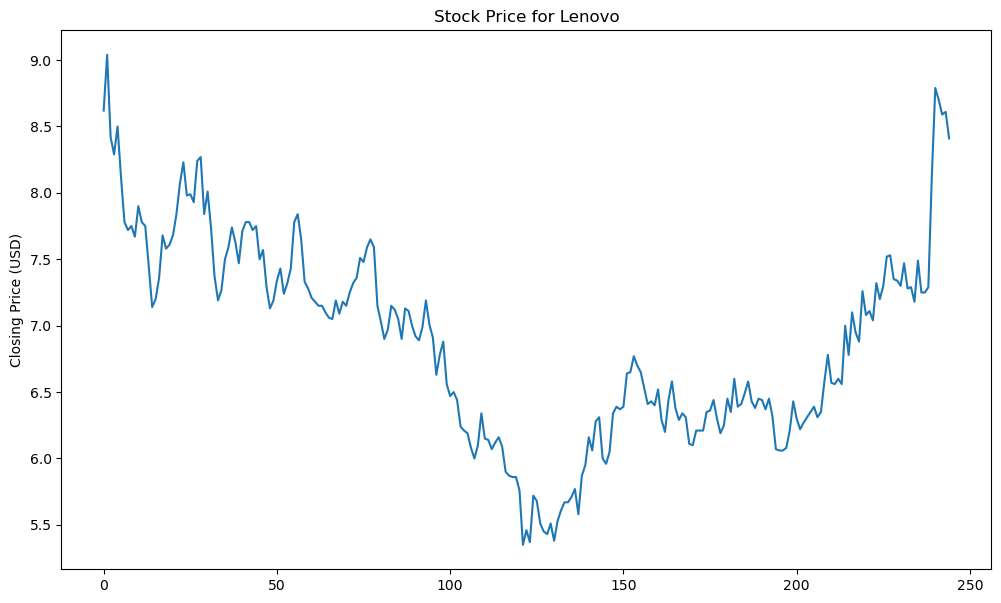

In [8]:
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Close'])
plt.title("Stock Price for Lenovo")
plt.ylabel("Closing Price (USD)")
plt.show()

# Interpretation
We see that the stock price is very variable and as of now we see that the trend is on a significant increase, and according to the amrket share of lenovo, is very high. Combining the total sales for Lenovo, HP and Dell, the total market hold is over one third of the total market pc sales. The drop we saw in the stock price was greatly due to the fall in 2017 due to increased export prices and shortage of equipments and spare parts. Although this is issue is now resolved and there seems to be no such issue rising, hence we can say that in today's market, Lenovo holds a very good market value and share price.

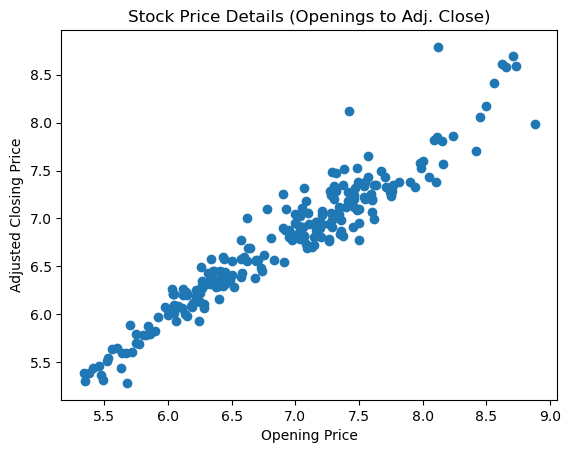

In [9]:
plt.scatter(df['Open'],df['Adj Close'])
plt.title('Stock Price Details (Openings to Adj. Close)')
plt.xlabel('Opening Price')
plt.ylabel('Adjusted Closing Price')
plt.show()

# Interpretation
We see an increasing trend in both of the Adjusted Closing Price and the opening price which means that there is a positive market segment and potential growth for the company. The investors perceive the company's prospects positively, leading to increased demand for the stock. It suggests that the market believes the company's financial health is improving, its business strategy is effective, or its competitive position is strengthening. However, we must do a thorough research before we make any investment decisions in the company.

In [10]:
df1 = pd.read_excel('Len.xlsx', sheet_name = 'Sales')
df2 = pd.read_excel('Len.xlsx', sheet_name = 'Revenue')
df3 = pd.read_excel('Len.xlsx',sheet_name = 'Laptop Market Share')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        7 non-null      int64
 1    Consumer Laptops (in $mn)  7 non-null      int64
 2    Business Laptops (in $mn)  7 non-null      int64
 3    Desktop Coputers (in $mn)  7 non-null      int64
 4    Tablets (in $mn)           7 non-null      int64
dtypes: int64(5)
memory usage: 408.0 bytes


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5 non-null      int64  
 1   Consumer PCs (in $bn)    5 non-null      float64
 2   Business PCs (in $bn)    5 non-null      float64
 3   Mobile Devices (in $bn)  5 non-null      float64
 4   Data Center (in $bn)     5 non-null      float64
 5   Others (in $bn)          5 non-null      float64
 6   Total Revenue (in $bn)   5 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 408.0 bytes


In [13]:
df1.head()

,Year,Consumer Laptops (in $mn),Business Laptops (in $mn),Desktop Coputers (in $mn),Tablets (in $mn)
0,2017,10,8,5,3
1,2018,12,9,6,4
2,2019,14,10,7,4
3,2020,11,9,6,3
4,2021,13,11,8,5


In [14]:
df2.head()

,Year,Consumer PCs (in $bn),Business PCs (in $bn),Mobile Devices (in $bn),Data Center (in $bn),Others (in $bn),Total Revenue (in $bn)
0,2016,10.0,8.0,4.0,3.0,2.0,27.0
1,2017,11.0,9.0,5.0,4.0,2.5,31.5
2,2018,12.0,10.0,6.0,5.0,3.0,36.0
3,2019,12.5,10.5,6.5,5.5,3.5,38.0
4,2020,13.0,11.0,6.5,5.5,3.5,39.0


In [15]:
df1.columns

Index(['Year', ' Consumer Laptops (in $mn)', ' Business Laptops (in $mn)',
       ' Desktop Coputers (in $mn)', ' Tablets (in $mn)'],
      dtype='object')

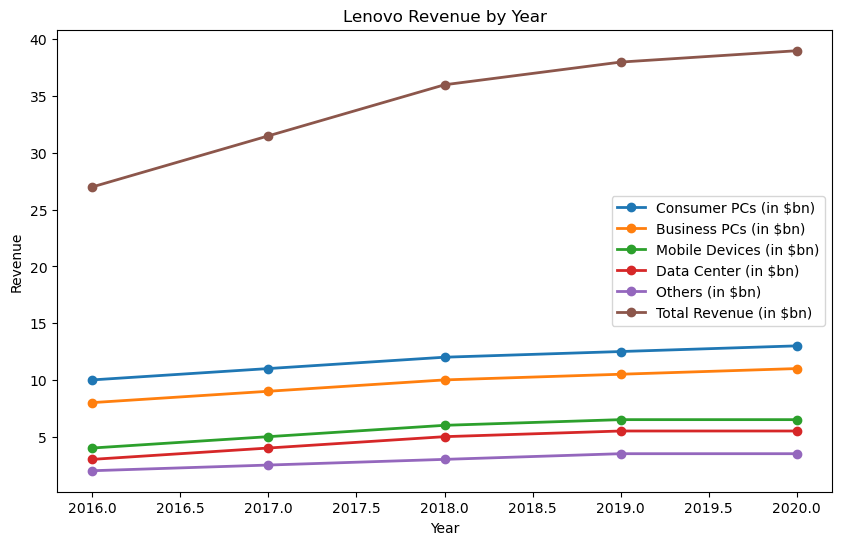

In [16]:
grouped_df2 = df2.groupby('Year')[['Consumer PCs (in $bn)', 'Business PCs (in $bn)',
       'Mobile Devices (in $bn)', 'Data Center (in $bn)', 'Others (in $bn)',
       'Total Revenue (in $bn)']].sum()

# Plotting the stacked line chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Loop through each device and plot a line for each device
for column in grouped_df2.columns:
    plt.plot(grouped_df2.index, grouped_df2[column], marker='o', linewidth=2)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Lenovo Revenue by Year')

# Create a legend for the chart
plt.legend(grouped_df2.columns)

# Show the chart
plt.show()

# Interpretation
we see that there is a short decrease in the mobiles devices over time, because it has very strong competitors, espicially Samsung and Apple who are having a very high and strong market share are leading the market. Lenovo's mobile segment is Motorola and why mottorola hasn't been very successful is due to it's weak targeting and segmentation, because of which, people aren't much aware of the brands, which again shows the weak marketing. Motorola usually makes low end mobile devices but there also there is a tough competition as there are a lot of sustitutes available and companies such as Vivo, Xiaomi, Samsung and Oppo provide better features for the same price category.
As for the laptops and PCs segment, they have a very strong hold which is because of the vide avriety and good services available for the product. They also have a good market hold ebcause of the vide variety of laptops to choose from including the proper segmentation, targetting all classes.

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        7 non-null      int64
 1    Consumer Laptops (in $mn)  7 non-null      int64
 2    Business Laptops (in $mn)  7 non-null      int64
 3    Desktop Coputers (in $mn)  7 non-null      int64
 4    Tablets (in $mn)           7 non-null      int64
dtypes: int64(5)
memory usage: 408.0 bytes


In [18]:
print(df1.columns)

Index(['Year', ' Consumer Laptops (in $mn)', ' Business Laptops (in $mn)',
       ' Desktop Coputers (in $mn)', ' Tablets (in $mn)'],
      dtype='object')


In [19]:
grouped_df1 = df1.groupby('Year')[' Consumer Laptops (in $mn)', ' Business Laptops (in $mn)',
       ' Desktop Coputers (in $mn)', ' Tablets (in $mn)'].sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14420\461419976.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df1 = df1.groupby('Year')[' Consumer Laptops (in $mn)', ' Business Laptops (in $mn)',


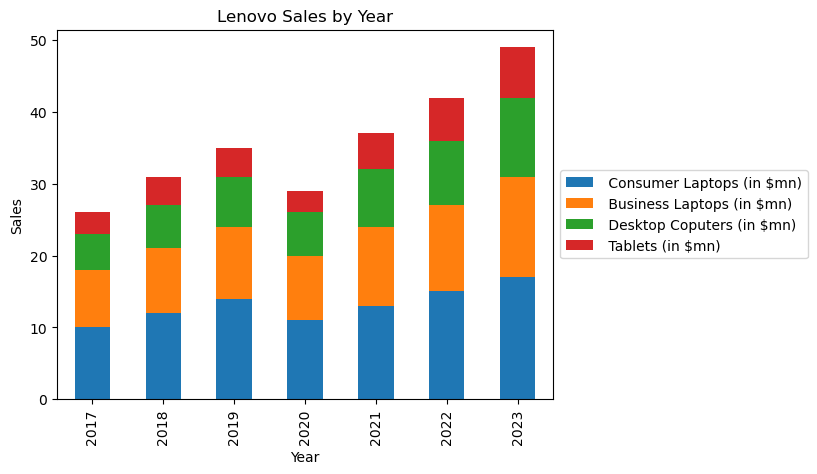

In [20]:
fig, ax = plt.subplots()
grouped_df1.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Lenovo Sales by Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Interpretation
We see the sales for the different segments and we also see that there is a steady rise in the sales each fiscal year, with an exception of the year 2020, the sales were lacking due to the lockdown restrictions and the lack of availablity of goods and spare parts in the market for a good perod of time. Although, we again see significant growth with the year 2021 as there was lesser restrictions and the markets were opening up again and the graph increase each year as shown in the bar plot above.

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   6 non-null      object 
 1   Q1 2023  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


In [22]:
a = df3['Q1 2023'].astype(float)

In [23]:
b = df3['Brands']

Text(0.5, 1.0, 'Market Share for Laptops')

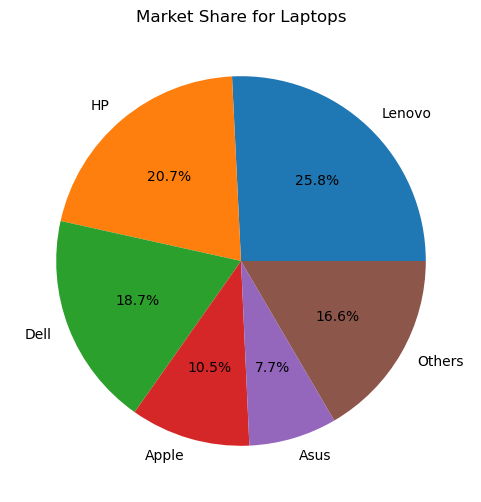

In [24]:
plt.figure(figsize=(6,6))
plt.pie(a,labels=b, autopct='%1.1f%%')
plt.title('Market Share for Laptops')

# Interpretation
It is clearly visible that Lenovo holds the maximum market share for the PC and Laptop market share is of Lenovo, followed by that of HP and then Dell. Although, Lenovo holds the maximum share, but it is never enough to have more, therefore we must work on capturing more market share by working on the marketing tactics and giving out better deals. We must also retain the present market share, and to do so, the loyalty program needs more work, the deals and cashback offers are from a range of 3% to 9%, and they expire within a limited time(6 months) frame and not a lot of people can redeem those offers, therefore this is one point which can be worked on. Another way to increase the sales are by the help of contracts or joint projects with different companies, such as one of the upcoming pcs which is to be launched by Dell and Lenovo, working on more projects like them can be very helpful.

## Decision Tree


In [25]:
x = df.drop('Close', axis=1)
y = df['Close']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=10)

In [27]:
lr= LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
Predictions = lr.predict(x_test)

In [30]:
linear_rmse = np.sqrt(mean_squared_error(y_test, Predictions))

In [31]:
linear_rmse

1.9860273225978185e-15

In [32]:
y_pred_test_lr = lr.predict(x_test)

In [33]:
dtr = DecisionTreeRegressor()

In [34]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
tree_predictions = dtr.predict(x_test)

In [36]:
clf = DecisionTreeRegressor(min_samples_split=20)

In [37]:
clf = clf.fit(x_test, y_test)

In [38]:
clf

DecisionTreeRegressor(min_samples_split=20)

[Text(0.5, 0.8333333333333334, 'X[4] <= 6.745\nsquared_error = 0.544\nsamples = 49\nvalue = 6.81'),
 Text(0.25, 0.5, 'X[5] <= 5.951\nsquared_error = 0.101\nsamples = 25\nvalue = 6.177'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.055\nsamples = 6\nvalue = 5.715'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.027\nsamples = 19\nvalue = 6.323'),
 Text(0.75, 0.5, 'X[4] <= 7.535\nsquared_error = 0.155\nsamples = 24\nvalue = 7.469'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.025\nsamples = 14\nvalue = 7.191'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.079\nsamples = 10\nvalue = 7.857')]

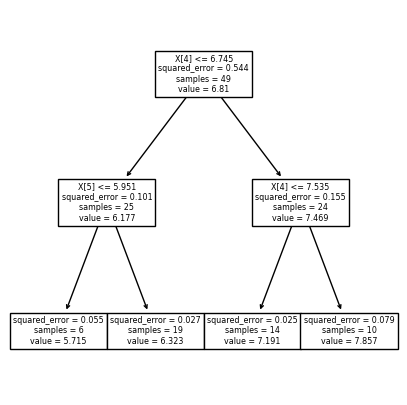

In [39]:
plt.figure(figsize = (5,5))
tree.plot_tree(clf)

In [40]:
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predictions))

In [41]:
print("Decision Tree RMSE:", tree_rmse)

Decision Tree RMSE: 0.024907993963089577
